# Investigating Titanic Dataset

This project aims to investigate **what factors made passengers of Titanic more likely to survive**. For that, it will be analysed the Titanic dataset provided by Udacity on this [link](https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv).
This dataset contains information about a sample of 891 passengers, including whether or not they survived the disaster. The idea is to analyze each sample information (dataset columns) and to evaluate which ones have stood out among the survivors.

## Global Settings

The tools that will be used to support the analysis are NumPy arrays, Pandas series and dataframes and Matplotlib/Seaborn charts. To make this document more concise and focused on the analysis, I created a separate module called `helpers` containing some functions to help with statistical calculations and plotting using the Matplotlib library. 

The following are global settings, libraries imports and loading of dataset required for this project.

In [1]:
# it sets up matplotlib to shows plots inline, do not in other window
%matplotlib inline
# it sets up better quality of image plot
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import seaborn as sns
import helpers as hlp

# it loads dataset to Pandas dataframe
titanic_df = pd.read_csv("titanic-data.csv") 
# it shows first 5 dataframe rows
titanic_df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Analysis Process (Step by Step)

To begin the analysis of dataset, first, it is necessary to evaluate the amount of information available. The table below shows the percentage of missing values for each dataset column.

In [2]:
# it calcutates per column the amount of missing values
hlp.missing_values(titanic_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Missing Values (%),0.0,0.0,0.0,0.0,0.0,19.87,0.0,0.0,0.0,0.0,77.1,0.22


The percentage of missing values in the **Cabin** column (77%) is high. Therefore, it will be discarded from the analysis. The **Age** column has about 20% of missing values, but it will not be discarded. The remaining values will be analyzed. The same for **Embarked** column.

In [3]:
# it removes 'Cabin' column from dataframe
titanic_df = titanic_df.drop('Cabin', axis='columns')
# it shows first 5 dataframe rows
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


The next step is the classification of information in each column (variable). Classification helps identify the best method for analysis. The analysis for a qualitative variable (nominal or ordinal) is different from the analysis of a quantitative variable (discrete or continuous).

The first (unnamed) column is the index created by Pandas. The others columns are:
* **PassengerId**: a sequential integer number that uniquely identifies a passenger. This column represents a <u>discrete quantitative variable</u>. For the analysis, this variable will not be considered an <u>independent variable</u>, but just a variable to axiliate in the aggregation functions.
* **Survived**: informs if the passenger survived (1) or did not survive (0) the Titanic disaster. Although this column has numeric values, it represents a <u>nominal qualitative variable</u>. For the analysis, this variable will be considered the <u>dependent variable</u>.
* **Pclass**: informs the socio-economic status (1: upper, 2: middle and 3: lower) of a passenger on the Titanic. As in the Survived column, although this column has numeric values, it represents a <u>ordinal qualitative variable</u>. For the analysis, this variable will be considered an <u>independent variable</u>. 
* **Name**:	informs the name of a passenger. It represents a <u>nominal qualitative variable</u>. For the analysis, this variable will not be considered.
* **Sex**: informs the sex (male or female) of a passagenger. It represents a <u>nominal qualitative variable</u>. For the analysis, this variable will be considered an <u>independent variable</u>.
* **Age**: informs the age of a passagenger. It is fractional if less than 1. If the age is estimated, is it in the form of xx.5. It represents a <u>continuous quantitative variable</u>. For the analysis, this variable will be considered an <u>independent variable</u>.
* **SibSp**: informs the number of siblings (brother, sister, half-brother, brotherhood) and spouse (husband and wife) who have embarked with a passenger. It represents a <u>discrete quantitative variable</u>. For the analysis, this variable will be transformed in a <u>nominal quanlitative variable</u> called **Alone** along with **Parch** to indicate whether a passenger travelled alone or with family.
* **Parch**: informs the number of parent (mother, father) and child (daughter, son, stepdaughter, stepson) who have embarked with a passenger. Some children travelled only with a nanny, therefore Parch column is 0 for them. It represents a <u>discrete quantitative variable</u>. For the analysis, this variable will be transformed in a <u>nominal quanlitative variable</u> called **Alone** along with **SibSp** to indicate whether a passenger travelled alone or with family.
* **Ticket**: informs the ticket number used by passenger. The same ticket number can be used for more than one passenger, possibly indicating that the passengers traveled together or as a family. It represents a <u>nominal qualitative variable</u>. For the analysis, this variable will not be considered because the new variable **Alone** will already indicate whether the passenger traveled alone or not.
* **Fare**: informs the passenger fare. It represents a <u>continuous quantitative variable</u>. For the analysis, this variable will not be considered because **Pclass** variable already indicate socio-economic status.
* **Embarked**: informs the port (C: Cherbourg, Q: Queenstown, S: Southampton) where a passenger embarked. It represents a <u>nominal qualitative variable</u>. For the analysis, this variable will be considered the <u>independent variable</u>.

The code below creates the **Alone** variable (column) as previously mentioned.

In [4]:
# it sums columns 'SibSp' and 'Parch'
sibsp_parch = titanic_df['SibSp'] + titanic_df['Parch']
# it replaces '0' to 'Yes' and other values to 'No'
alone_column = sibsp_parch.apply(lambda elem: 'Yes' if elem == 0 else 'No')
# it add column 'Alone' to Titanic dataframe
titanic_df['Alone'] = alone_column
# it shows first 5 dataframe rows
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,No
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,No
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Yes


And the code below discards the columns that will not be considered in the analysis.

In [5]:
# it removes 'Name' column from dataframe
titanic_df = titanic_df.drop('Name', axis='columns')
# it removes 'Ticket' column from dataframe
titanic_df = titanic_df.drop('Ticket', axis='columns')
# it removes 'Fare' column from dataframe
titanic_df = titanic_df.drop('Fare', axis='columns')
# it removes 'SibSp' column from dataframe
titanic_df = titanic_df.drop('SibSp', axis='columns')
# it removes 'Parch' column from dataframe
titanic_df = titanic_df.drop('Parch', axis='columns')
# it shows first 5 dataframe rows
titanic_df.head() 

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Alone
0,1,0,3,male,22.0,S,No
1,2,1,1,female,38.0,C,No
2,3,1,3,female,26.0,S,Yes
3,4,1,1,female,35.0,S,No
4,5,0,3,male,35.0,S,Yes


For each qualitative column, their numerical values or abbreviations will be replaced by their respective names with the first letter capitalized to better presentation of results.

In [6]:
# on 'Survived' column, it replaces '0' to 'No' and '1' to 'Yes'
titanic_df['Survived'] = titanic_df['Survived'].map({0: 'No', 1: 'Yes'})
# on 'Pclass' column, it replaces '1' to 'Upper' and '2' to 'Middle' and '3' to 'Lower'
titanic_df['Pclass'] = titanic_df['Pclass'].map({1: 'Upper', 2: 'Middle', 3: 'Lower'})
# on 'Sex' column, it replaces 'male' to 'Male' and 'female' to 'Female'
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 'Male', 'female': 'Female'})
# on 'Embarked' column, it replaces 'C' to 'Cherbourg' and 'Q' to 'Queenstown' and 'S' to 'Southampton'
titanic_df['Embarked'] = titanic_df['Embarked'].map({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})
# it shows first 5 dataframe rows
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Alone
0,1,No,Lower,Male,22.0,Southampton,No
1,2,Yes,Upper,Female,38.0,Cherbourg,No
2,3,Yes,Lower,Female,26.0,Southampton,Yes
3,4,Yes,Upper,Female,35.0,Southampton,No
4,5,No,Lower,Male,35.0,Southampton,Yes


Before to analyze the independent variables, let's look at the proportion of Titanic survivors in the data sample.

In [7]:
# It aggregates the 'Survived' column applying counting
survived_df = hlp.group_survived(titanic_df, apply='count')

print("")
print("The frequency of non-survivor and survivor passangers (overall): ")
# it shows margin 'All' in index
hlp.show_margin(survived_df, axis='columns')


The frequency of non-survivor and survivor passangers (overall): 


,PassengerId
Survived,
Yes,342
No,549
All,891


In [8]:
# it calculates relative frequency (proportion) to 'PassengerId' column in relation to 'Survived' index
survived_freq = hlp.frequency(survived_df, axis='index')

print("")
print("The relative frequency (proportion) of non-survivor and survivor passangers (overall): ")
# it shows margin 'All' in index
hlp.show_margin(survived_freq, axis='columns')


The relative frequency (proportion) of non-survivor and survivor passangers (overall): 


,PassengerId
Survived,
Yes,0.383838
No,0.616162
All,1.000000



Plotting the relative frequency (proportion) of non-survivor and survivor passangers (overall): 


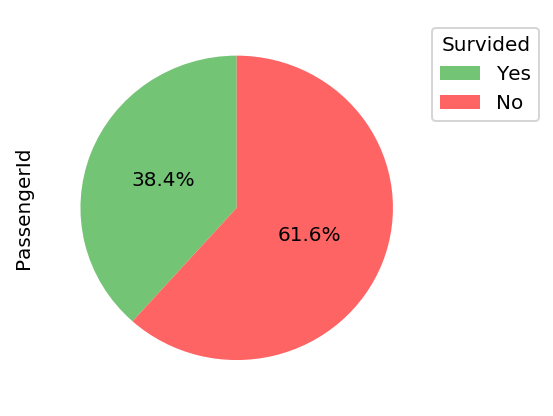

In [9]:
print("")
print("Plotting the relative frequency (proportion) of non-survivor and survivor passangers (overall): ")
# it plots a pie chart of relative frequencies (proportions)
hlp.survived_plot_pie(survived_df)

It can be noted that only 38.4% of sample of passengers survived the Titanic disaster.

### Analyzing Qualitative Data

From here, it will be statisticaly analyzed each independent variables in relation to dependent variable **Survived**. Let's start with qualitative independent variables: **Pclass**, **Sex**, **Embarked** and **Alone**.

#### Is the socio-economic status (Pclass) a factor that made passengers of Titanic more likely to survive?

To answer this question, first look at the proportion of Titanic survivors among socio-economic status (Pclass).

In [10]:
# It aggregates the 'Survived' and 'Pclass' columns applying counting on 'PassengerId'
survived_pclass_df = hlp.group_survived(titanic_df, by='Pclass', apply='count')

print("")
print("The frequency of non-survivor and survivor passangers among socio-economic status (Pclass):")
# it shows margin 'All' in index
hlp.show_margin(survived_pclass_df, axis='columns')


The frequency of non-survivor and survivor passangers among socio-economic status (Pclass):


Pclass,Lower,Middle,Upper
Survived,,,
Yes,119,87,136
No,372,97,80
All,491,184,216


In [11]:
# it calculates relative frequency (proportion) to 'Pclass' columns in relation to 'Survived' index
survived_pclass_freq = hlp.frequency(survived_pclass_df, axis='index')

print("")
print("The relative frequency (proportion) of non-survivor and survivor passangers among socio-economic status (Pclass):")
# it shows margin 'All' in index
hlp.show_margin(survived_pclass_freq, axis='columns')


The relative frequency (proportion) of non-survivor and survivor passangers among socio-economic status (Pclass):


Pclass,Lower,Middle,Upper
Survived,,,
Yes,0.242363,0.472826,0.62963
No,0.757637,0.527174,0.37037
All,1.000000,1.000000,1.00000



Plotting of the relative frequency (proportion) of non-survivor and survivor passangers among socio-economic status (Pclass):


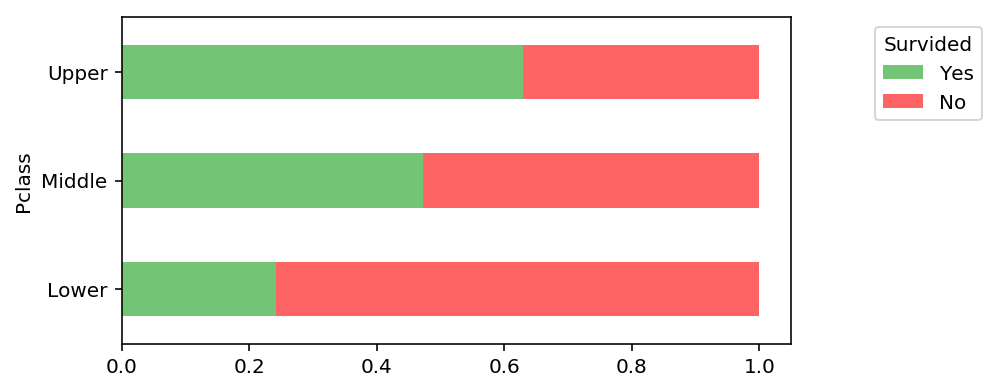

In [12]:
print("")
print("Plotting of the relative frequency (proportion) of non-survivor and survivor passangers \
among socio-economic status (Pclass):")
# it plots a stacked horizontal bar chart of relative frequencies (proportions)
hlp.survivor_plot_bar(survived_pclass_freq)

It can be note that upper socio-economic status (Pclass) made passengers of Titanic more likely to survive. About 63% of upper class passengers survived. **But is this likelyhood statiscally significant?** To answer this question it will be calculate **Chi Square** $({\chi}^2)$ statistic value at .05 of significance. It will be used Chi Square statistic because both **Survived** and **Pclass** are <u>qualitative variables</u>.

> ${\chi}^2=\sum \frac{(Observed_{ij} \, - \, Expexted_{ij})^2}{Expexted_{ij}}$

To calculate the ${\chi}^2$, first it necessary calculate the expected values $(Expexted_{ij})$ from observed values $(Observed_{ij})$ for each **Pclass** $(i)$ in relation to **Survived** $(j)$.

> $Expexted_{ij}=\frac{Observed \, Pclass \, All_{i} \, - \, Observed \, Survived \, All_{j}}{All \, All}$

The table below shows the values required for the calculation.

In [13]:
print("")
print("The frequency of non-survivor and survivor passangers among socio-economic status (Pclass):")
# it shows margin 'All' in index and columns
hlp.show_margin(survived_pclass_df)


The frequency of non-survivor and survivor passangers among socio-economic status (Pclass):


Pclass,Lower,Middle,Upper,All
Survived,,,,
Yes,119,87,136,342
No,372,97,80,549
All,491,184,216,891


And, the table below shows the results of the expected value calculation.

In [14]:
print("")
print("Expected value for each 'Pclass' in relation to 'Survived':")
# it calculates the expected value
hlp.expected_value(survived_pclass_df)


Expected value for each 'Pclass' in relation to 'Survived':


Pclass,Lower,Middle,Upper
Survived,,,
Yes,188.464646,70.626263,82.909091
No,302.535354,113.373737,133.090909


Now, it is calcutated the ${\chi}^2$.

In [15]:
print("")
print("Chi Square value for 'Pclass' and 'Survived':")
# it calculates the chi square value (observed value, expected value)
hlp.chi_square(survived_pclass_df, hlp.expected_value(survived_pclass_df))


Chi Square value for 'Pclass' and 'Survived':


102.88898875696059

> ${\chi}^2 \approx 102.89$

Calculating the dregees of fredom it gives 2. (The 'All' row/index and 'All' column are not considered on the calculation of degrees of freedom.)

> df = (number of rows - 1) (number of columns - 1)

> df = (2 - 1) (3 - 1)

> df = 2

Consulting the ([chi-square distribution table](http://passel.unl.edu/Image/Namuth-CovertDeana956176274/chi-sqaure%20distribution%20table.PNG)) it has critical value with a significance of .05 equal to 5.99. Thus, as the value of ${\chi}^2$ is greater than 5.99 then socio-economic status (Pclass) is statiscally significant at .05. **But how strong is correlation of Pclass and Survived variables?** To answer this question it will be calculated the **Cramér's V** association and the result will be compared with the table below.

> ${\phi_{c}}=\sqrt{\frac{{\chi}^2}{n\, \times \, min(number\,of\,rows\,-\,1,\,number\,of\,columns\,-\,1)}}$


|Degrees of Freedom|Small Effect|Medium Effect|Large Effect|
|:----------------:|:----------:|:-----------:|:----------:|
|1                 | 0.10       |0.30         |0.50        |
|2                 | 0.07       |0.21         |0.35        |
|3                 | 0.06       |0.17         |0.29        |


In [16]:
print("")
print("Cramér's V association for 'Pclass' and 'Survived':")
# it calculates the Cramér's V association
hlp.cramersV(survived_pclass_df)


Cramér's V association for 'Pclass' and 'Survived':


0.3398173880053118

It can be note that **Pclass** variable has a medium effect (but very closed to large effect) over **Survived** variable. Therefore, it can be concluded that the social-economic class is a factor that contributed in a medium way to the survival of some passengers of the Titanic shipwreck. And passengers on upper social-economic class had about 63% chances of surviving.

#### Is the sex a factor that made passengers of Titanic more likely to survive?

To answer this question, first look at the proportion of Titanic survivors between female and male.

In [17]:
# It aggregates the 'Survived' and 'Sex' columns applying counting on 'PassengerId'
survived_sex_df = hlp.group_survived(titanic_df, by='Sex', apply='count')

print("")
print("The frequency of non-survivor and survivor passangers between female and male:")
# it shows margin 'All' in index
hlp.show_margin(survived_sex_df, axis='columns')


The frequency of non-survivor and survivor passangers between female and male:


Sex,Female,Male
Survived,,
Yes,233,109
No,81,468
All,314,577


In [18]:
# it calculates relative frequency (proportion) to 'Sex' columns in relation to 'Survived' index
survived_sex_freq = hlp.frequency(survived_sex_df, axis='index')

print("")
print("The relative frequency (proportion) of non-survivor and survivor passangers between female and male:")
# it shows margin 'All' in index
hlp.show_margin(survived_sex_freq, axis='columns')


The relative frequency (proportion) of non-survivor and survivor passangers between female and male:


Sex,Female,Male
Survived,,
Yes,0.742038,0.188908
No,0.257962,0.811092
All,1.000000,1.000000



Plotting of the relative frequency (proportion) of non-survivor and survivor passangers between female and male:


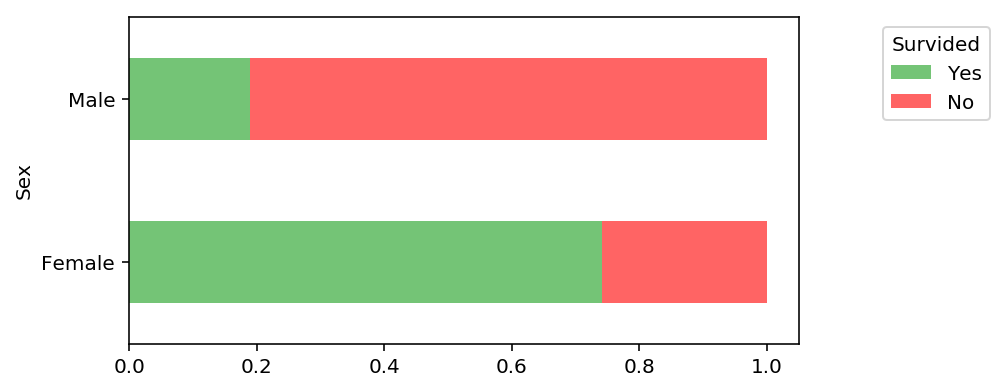

In [19]:
print("")
print("Plotting of the relative frequency (proportion) of non-survivor and survivor passangers \
between female and male:")
# it plots a stacked horizontal bar chart of relative frequencies (proportions)
hlp.survivor_plot_bar(survived_sex_freq)

It can be note that female passengers of Titanic are more likely to survive. About 74% of female passengers survived. **But is this likelyhood statiscally significant?** To answer this question it will be calculate **Chi Square** $({\chi}^2)$ statistic value at .05 of significance.

> ${\chi}^2=\sum \frac{(Observed_{ij} \, - \, Expexted_{ij})^2}{Expexted_{ij}}$

To calculate the ${\chi}^2$, first it necessary calculate the expected values $(Expexted_{ij})$ from observed values $(Observed_{ij})$ for each **Sex** $(i)$ in relation to **Survived** $(j)$.

> $Expexted_{ij}=\frac{Observed \, Sex \, All_{i} \, - \, Observed \, Survived \, All_{j}}{All \, All}$

The table below shows the values required for the calculation.

In [20]:
print("")
print("The frequency of non-survivor and survivor passangers between female and male:")
# it shows margin 'All' in index and columns
hlp.show_margin(survived_sex_df)


The frequency of non-survivor and survivor passangers between female and male:


Sex,Female,Male,All
Survived,,,
Yes,233,109,342
No,81,468,549
All,314,577,891


And, the table below shows the results of the expected value calculation.

In [21]:
print("")
print("Expected value for each 'Sex' in relation to 'Survived':")
# it calculates the expected value
hlp.expected_value(survived_sex_df)


Expected value for each 'Sex' in relation to 'Survived':


Sex,Female,Male
Survived,,
Yes,120.525253,221.474747
No,193.474747,355.525253


Now, it is calcutated the ${\chi}^2$.

In [22]:
print("")
print("Chi Square value for 'Sex' and 'Survived':")
# it calculates the chi square value (observed value, expected value)
hlp.chi_square(survived_sex_df, hlp.expected_value(survived_sex_df))


Chi Square value for 'Sex' and 'Survived':


263.05057407065567

> ${\chi}^2 \approx 263.05$

Calculating the dregees of fredom it gives 1. (The 'All' row/index and 'All' column are not considered on the calculation of degrees of freedom.)

> df = (number of rows - 1) (number of columns - 1)

> df = (2 - 1) (2 - 1)

> df = 1

Consulting the ([chi-square distribution table](http://passel.unl.edu/Image/Namuth-CovertDeana956176274/chi-sqaure%20distribution%20table.PNG)) it has critical value with a significance of .05 equal to 3.89. Thus, as the value of ${\chi}^2$ is greater than 3.84 then sex is statiscally significant at .05. **But how strong is correlation of Sex and Survived variables?** To answer this question it will be calculated the **Cramér's V** association and the result will be compared with the table below.

> ${\phi_{c}}=\sqrt{\frac{{\chi}^2}{n\, \times \, min(number\,of\,rows\,-\,1,\,number\,of\,columns\,-\,1)}}$


|Degrees of Freedom|Small Effect|Medium Effect|Large Effect|
|:----------------:|:----------:|:-----------:|:----------:|
|1                 | 0.10       |0.30         |0.50        |
|2                 | 0.07       |0.21         |0.35        |
|3                 | 0.06       |0.17         |0.29        |


In [23]:
print("")
print("Cramér's V association for 'Sex' and 'Survived':")
# it calculates the Cramér's V association
hlp.cramersV(survived_sex_df)


Cramér's V association for 'Sex' and 'Survived':


0.54335138065775512

It can be note that **Sex** variable has a large effect over **Survived** variable. Therefore, it can be concluded that the sex is a factor that contributed in a large way to the survival of some passengers of the Titanic shipwreck. And female passengers who had a 74% chance of surviving.

#### Is the embarkment port a factor that made passengers of Titanic more likely to survive?

To answer this question, first look at the proportion of Titanic survivors among the three embarkment ports.

In [24]:
# It aggregates the 'Survived' and 'Embarked' columns applying counting on 'PassengerId'
survived_port_df = hlp.group_survived(titanic_df, by='Embarked', apply='count')

print("")
print("The frequency of non-survivor and survivor passangers among the embarkment ports:")
# it shows margin 'All' in index
hlp.show_margin(survived_port_df, axis='columns')


The frequency of non-survivor and survivor passangers among the embarkment ports:


Embarked,Cherbourg,Queenstown,Southampton
Survived,,,
Yes,93,30,217
No,75,47,427
All,168,77,644


In [25]:
# it calculates relative frequency (proportion) to 'Embarked' columns in relation to 'Survived' index
survived_port_freq = hlp.frequency(survived_port_df, axis='index')

print("")
print("The relative frequency (proportion) of non-survivor and survivor passangers among the embarkment ports:")
# it shows margin 'All' in index
hlp.show_margin(survived_port_freq, axis='columns')


The relative frequency (proportion) of non-survivor and survivor passangers among the embarkment ports:


Embarked,Cherbourg,Queenstown,Southampton
Survived,,,
Yes,0.553571,0.38961,0.336957
No,0.446429,0.61039,0.663043
All,1.000000,1.00000,1.000000



Plotting of the relative frequency (proportion) of non-survivor and survivor passangers among the embarkment ports:


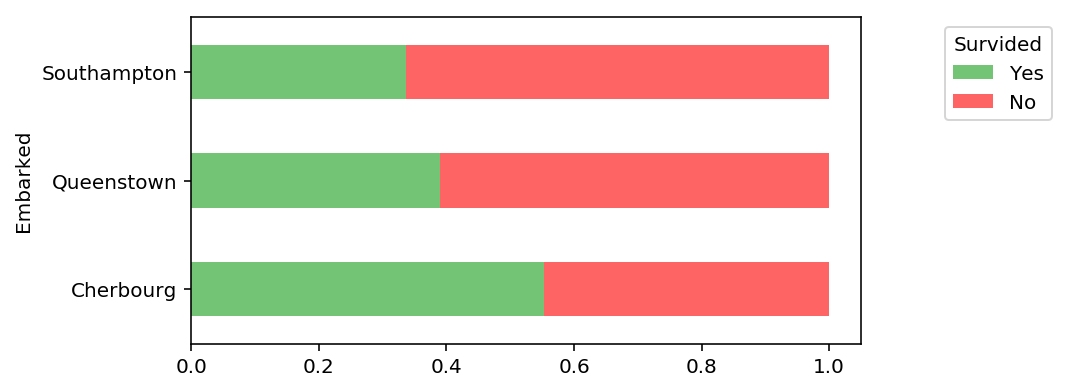

In [26]:
print("")
print("Plotting of the relative frequency (proportion) of non-survivor and survivor passangers \
among the embarkment ports:")
# it plots a stacked horizontal bar chart of relative frequencies (proportions)
hlp.survivor_plot_bar(survived_port_freq)

It can be note that passengers that embarked at Cherbourg port are more likely to survive. About 55% of passengers who embarked there survived. **But is this likelyhood statiscally significant?** To answer this question it will be calculate **Chi Square** $({\chi}^2)$ statistic value at .05 of significance.

> ${\chi}^2=\sum \frac{(Observed_{ij} \, - \, Expexted_{ij})^2}{Expexted_{ij}}$

To calculate the ${\chi}^2$, first it necessary calculate the expected values $(Expexted_{ij})$ from observed values $(Observed_{ij})$ for each **Embarked** $(i)$ in relation to **Survived** $(j)$.

> $Expexted_{ij}=\frac{Observed \, Embarked \, All_{i} \, - \, Observed \, Survived \, All_{j}}{All \, All}$

The table below shows the values required for the calculation.

In [27]:
print("")
print("The frequency of non-survivor and survivor passangers among the embarkment ports:")
# it shows margin 'All' in index and columns
hlp.show_margin(survived_port_df)


The frequency of non-survivor and survivor passangers among the embarkment ports:


Embarked,Cherbourg,Queenstown,Southampton,All
Survived,,,,
Yes,93,30,217,340
No,75,47,427,549
All,168,77,644,889


And, the table below shows the results of the expected value calculation.

In [28]:
print("")
print("Expected value for each 'Embarked' in relation to 'Survived':")
# it calculates the expected value
hlp.expected_value(survived_port_df)


Expected value for each 'Embarked' in relation to 'Survived':


Embarked,Cherbourg,Queenstown,Southampton
Survived,,,
Yes,64.251969,29.448819,246.299213
No,103.748031,47.551181,397.700787


Now, it is calcutated the ${\chi}^2$.

In [29]:
print("")
print("Chi Square value for 'Embarked' and 'Survived':")
# it calculates the chi square value (observed value, expected value)
hlp.chi_square(survived_port_df, hlp.expected_value(survived_port_df))


Chi Square value for 'Embarked' and 'Survived':


26.489149839237619

> ${\chi}^2 \approx 26.49$

Calculating the dregees of fredom it gives 2. (The 'All' row/index and 'All' column are not considered on the calculation of degrees of freedom.)

> df = (number of rows - 1) (number of columns - 1)

> df = (2 - 1) (3 - 1)

> df = 2

Consulting the ([chi-square distribution table](http://passel.unl.edu/Image/Namuth-CovertDeana956176274/chi-sqaure%20distribution%20table.PNG)) it has critical value with a significance of .05 equal to 5.99. Thus, as the value of ${\chi}^2$ is greater than 5.99 then embarkment port (Embarked) is statiscally significant at .05. **But how strong is correlation of Embarked and Survived variables?** To answer this question it will be calculated the **Cramér's V** association and the result will be compared with the table below.

> ${\phi_{c}}=\sqrt{\frac{{\chi}^2}{n\, \times \, min(number\,of\,rows\,-\,1,\,number\,of\,columns\,-\,1)}}$


|Degrees of Freedom|Small Effect|Medium Effect|Large Effect|
|:----------------:|:----------:|:-----------:|:----------:|
|1                 | 0.10       |0.30         |0.50        |
|2                 | 0.07       |0.21         |0.35        |
|3                 | 0.06       |0.17         |0.29        |


In [30]:
print("")
print("Cramér's V association for 'Embarked' and 'Survived':")
# it calculates the Cramér's V association
hlp.cramersV(survived_port_df)


Cramér's V association for 'Embarked' and 'Survived':


0.17261682709984438

It can be note that **Embarked** variable has a small effect over **Survived** variable. Therefore, it can be concluded that the embarkment port is a factor that contributed in a small way to the survival of some passengers of the Titanic shipwreck. And the passengers who embarked at the port of Cherbourg had a 55% chance of surviving.

#### Traveling alone or with family is a factor that made passengers of Titanic more likely to survive?

To answer this question, first look at the proportion of Titanic survivors between who travelled alone and who travelled with family.

In [31]:
# It aggregates the 'Survived' and 'Alone' columns applying counting on 'PassengerId'
survived_alone_df = hlp.group_survived(titanic_df, by='Alone', apply='count')

print("")
print("The frequency of non-survivor and survivor passangers who travelled alone and with family:")
# it shows margin 'All' in index
hlp.show_margin(survived_alone_df, axis='columns')


The frequency of non-survivor and survivor passangers who travelled alone and with family:


Alone,No,Yes
Survived,,
Yes,179,163
No,175,374
All,354,537


In [32]:
# it calculates relative frequency (proportion) to 'Alone' columns in relation to 'Survived' index
survived_alone_freq = hlp.frequency(survived_alone_df, axis='index')

print("")
print("The relative frequency (proportion) of non-survivor and survivor passangers \
who travelled alone and with family:")
# it shows margin 'All' in index
hlp.show_margin(survived_alone_freq, axis='columns')


The relative frequency (proportion) of non-survivor and survivor passangers who travelled alone and with family:


Alone,No,Yes
Survived,,
Yes,0.50565,0.303538
No,0.49435,0.696462
All,1.00000,1.000000



Plotting of the relative frequency (proportion) of non-survivor and survivor passangers who travelled alone and with family:


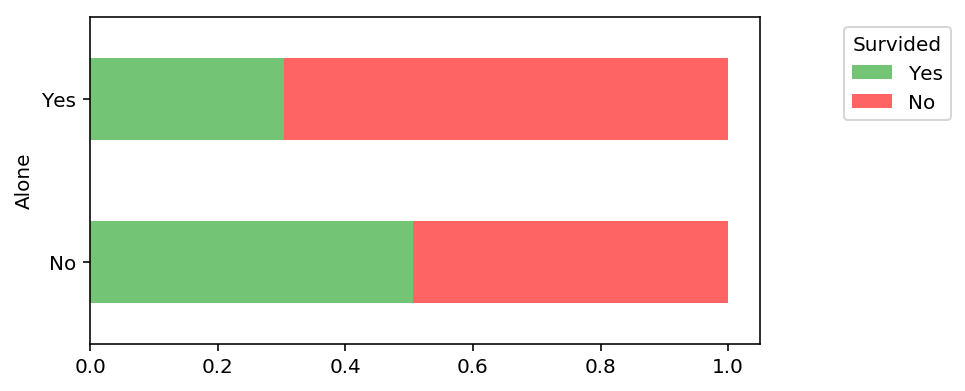

In [33]:
print("")
print("Plotting of the relative frequency (proportion) of non-survivor and survivor passangers \
who travelled alone and with family:")
# it plots a stacked horizontal bar chart of relative frequencies (proportions)
hlp.survivor_plot_bar(survived_alone_freq)

It can be note that passengers who travelled with family are more likely to survive. About 50% of passengers who travelled with family survived. **But is this likelyhood statiscally significant?** To answer this question it will be calculate **Chi Square** $({\chi}^2)$ statistic value at .05 of significance.

> ${\chi}^2=\sum \frac{(Observed_{ij} \, - \, Expexted_{ij})^2}{Expexted_{ij}}$

To calculate the ${\chi}^2$, first it necessary calculate the expected values $(Expexted_{ij})$ from observed values $(Observed_{ij})$ for each **Alone** $(i)$ in relation to **Survived** $(j)$.

> $Expexted_{ij}=\frac{Observed \, Alone \, All_{i} \, - \, Observed \, Survived \, All_{j}}{All \, All}$

The table below shows the values required for the calculation.

In [34]:
print("")
print("The frequency of non-survivor and survivor passangers who travelled alone and with family:")
# it shows margin 'All' in index and columns
hlp.show_margin(survived_alone_df)


The frequency of non-survivor and survivor passangers who travelled alone and with family:


Alone,No,Yes,All
Survived,,,
Yes,179,163,342
No,175,374,549
All,354,537,891


And, the table below shows the results of the expected value calculation.

In [35]:
print("")
print("Expected value for between 'Alone' and 'Survived':")
# it calculates the expected value
hlp.expected_value(survived_alone_df)


Expected value for between 'Alone' and 'Survived':


Alone,No,Yes
Survived,,
Yes,135.878788,206.121212
No,218.121212,330.878788


Now, it is calcutated the ${\chi}^2$.

In [36]:
print("")
print("Chi Square value for 'Alone' and 'Survived':")
# it calculates the chi square value (observed value, expected value)
hlp.chi_square(survived_alone_df, hlp.expected_value(survived_alone_df))


Chi Square value for 'Alone' and 'Survived':


36.85013084754587

> ${\chi}^2 \approx 36.85$

Calculating the dregees of fredom it gives 1. (The 'All' row/index and 'All' column are not considered on the calculation of degrees of freedom.)

> df = (number of rows - 1) (number of columns - 1)

> df = (2 - 1) (2 - 1)

> df = 1

Consulting the ([chi-square distribution table](http://passel.unl.edu/Image/Namuth-CovertDeana956176274/chi-sqaure%20distribution%20table.PNG)) it has critical value with a significance of .05 equal to 3.84. Thus, as the value of ${\chi}^2$ is greater than 3.84 then traveling alone or with family is statiscally significant at .05. **But how strong is correlation of Alone and Survived variables?** To answer this question it will be calculated the **Cramér's V** association and the result will be compared with the table below.

> ${\phi_{c}}=\sqrt{\frac{{\chi}^2}{n\, \times \, min(number\,of\,rows\,-\,1,\,number\,of\,columns\,-\,1)}}$


|Degrees of Freedom|Small Effect|Medium Effect|Large Effect|
|:----------------:|:----------:|:-----------:|:----------:|
|1                 | 0.10       |0.30         |0.50        |
|2                 | 0.07       |0.21         |0.35        |
|3                 | 0.06       |0.17         |0.29        |


In [37]:
print("")
print("Cramér's V association for 'Alone' and 'Survived':")
# it calculates the Cramér's V association
hlp.cramersV(survived_alone_df)


Cramér's V association for 'Alone' and 'Survived':


0.20336708569989195

It can be note that **Alone** variable has a small effect over **Survived** variable. Therefore, it can be concluded that the traveling alone or with family is a factor that contributed in a small way to the survival of some passengers of the Titanic shipwreck. And the passengers who travelled with family had a 50% chance of surviving.

### Analyzing Quantitative Data

From here, it will be statisticaly analyzed the **Age** variable in relation to dependent variable **Survived**.

#### Is the age a factor that made passengers of Titanic more likely to survive?

To answer this question, first look at descritive statistic of **Age** data grouped by **Survived**.

In [38]:
# It aggregates the 'Survived' column applying describe on 'Age'
survived_age_df = hlp.group_survived(titanic_df, apply='describe', on='Age')

survived_age_df

Age                                                    
          count       mean        std   min   25%   50%   75%   max
Survived                                                           
Yes       290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0
No        424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0

It can be noted that with the exception of counting, mean and median (50%) the other measures have their values very close. This can be seeing in the boxplot below.

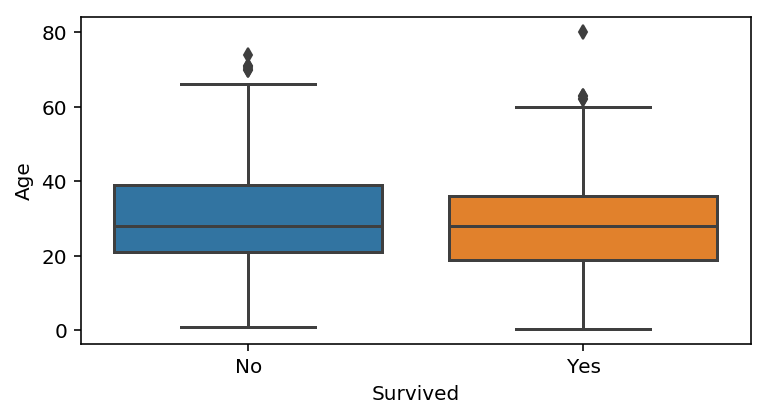

In [39]:
hlp.survived_plot_box(titanic_df[['Survived', 'Age']])

There is little variation between the group of sobrivents and the group of non-survivors. There is also little variation within the groups. At first, there seems to be no strong relationship between age and survival. But analyzing the histogram below can be noted that there is some variability between the age of the survivors and non survivors. 

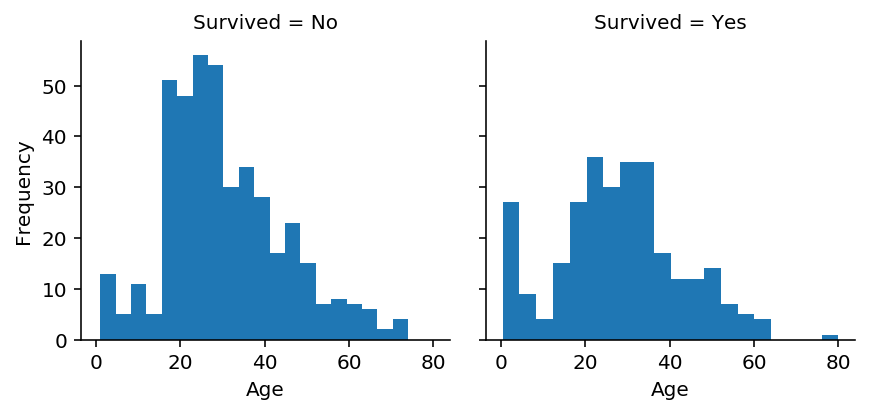

In [40]:
hlp.survived_plot_hist(titanic_df[['Survived', 'Age']])

**But is this variability statiscally significant?** To answer this question the discrete quantitative variable **Age** will be transformed in a ordinal qualitative variable. Thus, it will be calculated the **Chi Square** $({\chi}^2)$ statistic value at .05 of significance.

Firstly, it will be created a function that will map ages to age groups.

In [41]:
def age_to_agegroup(age):
    if age in range(0, 13):
        return 'Child'
    if age in range(13, 19):
        return 'Teen'
    if age in range(19, 31):
        return 'Young'
    if age in range(31, 51):
        return 'Adult'
    if age >= 51:
        return 'Elder'

Then, it will be created a new column called **AgeGroup** with the mapped values.

In [42]:
# it maps age to age group
agegroup_column = titanic_df['Age'].apply(age_to_agegroup)
# it add column 'AgeGroup' to Titanic dataframe
titanic_df['AgeGroup'] = agegroup_column
# it shows first 5 dataframe rows
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Alone,AgeGroup
0,1,No,Lower,Male,22.0,Southampton,No,Young
1,2,Yes,Upper,Female,38.0,Cherbourg,No,Adult
2,3,Yes,Lower,Female,26.0,Southampton,Yes,Young
3,4,Yes,Upper,Female,35.0,Southampton,No,Adult
4,5,No,Lower,Male,35.0,Southampton,Yes,Adult


Now, it will be calculated the proportion of Titanic survivors among age groups.

In [43]:
# It aggregates the 'Survived' and 'AgeGroup' columns applying counting on 'PassengerId'
survived_agegroup_df = hlp.group_survived(titanic_df, by='AgeGroup', apply='count')
survived_agegroup_df = survived_agegroup_df.reindex(columns=['Child', 'Teen', 'Young', 'Adult', 'Elder'])

print("")
print("The frequency of non-survivor and survivor passangers among age groups:")
# it shows margin 'All' in index
hlp.show_margin(survived_agegroup_df, axis='columns')


The frequency of non-survivor and survivor passangers among age groups:


AgeGroup,Child,Teen,Young,Adult,Elder
Survived,,,,,
Yes,33,30,96,101,22
No,29,39,169,130,42
All,62,69,265,231,64


In [44]:
# it calculates relative frequency (proportion) to 'AgeGroup' columns in relation to 'Survived' index
survived_agegroup_freq = hlp.frequency(survived_agegroup_df, axis='index')

print("")
print("The relative frequency (proportion) of non-survivor and survivor passangers among age groups:")
# it shows margin 'All' in index
hlp.show_margin(survived_agegroup_freq, axis='columns')


The relative frequency (proportion) of non-survivor and survivor passangers among age groups:


AgeGroup,Child,Teen,Young,Adult,Elder
Survived,,,,,
Yes,0.532258,0.434783,0.362264,0.437229,0.34375
No,0.467742,0.565217,0.637736,0.562771,0.65625
All,1.000000,1.000000,1.000000,1.000000,1.00000



Plotting of the relative frequency (proportion) of non-survivor and survivor passangers among age groups:


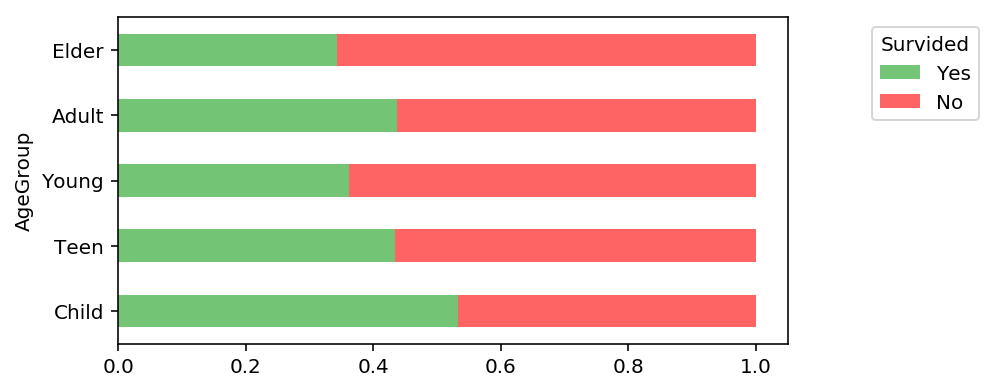

In [45]:
print("")
print("Plotting of the relative frequency (proportion) of non-survivor and survivor passangers among age groups:")
# it plots a stacked horizontal bar chart of relative frequencies (proportions)
hlp.survivor_plot_bar(survived_agegroup_freq)

It can be note that child passengers are more likely to survive. About 53% that survived. **But is this likelyhood statiscally significant?** To answer this question it will be calculate **Chi Square** $({\chi}^2)$ statistic value at .05 of significance.

> ${\chi}^2=\sum \frac{(Observed_{ij} \, - \, Expexted_{ij})^2}{Expexted_{ij}}$

To calculate the ${\chi}^2$, first it necessary calculate the expected values $(Expexted_{ij})$ from observed values $(Observed_{ij})$ for each **AgeGroup** $(i)$ in relation to **Survived** $(j)$.

> $Expexted_{ij}=\frac{Observed \, AgeGroup \, All_{i} \, - \, Observed \, Survived \, All_{j}}{All \, All}$

The table below shows the values required for the calculation.

In [46]:
print("")
print("The frequency of non-survivor and survivor passangers among age groups:")
# it shows margin 'All' in index and columns
hlp.show_margin(survived_agegroup_df)


The frequency of non-survivor and survivor passangers among age groups:


AgeGroup,Child,Teen,Young,Adult,Elder,All
Survived,,,,,,
Yes,33,30,96,101,22,282
No,29,39,169,130,42,409
All,62,69,265,231,64,691


And, the table below shows the results of the expected value calculation.

In [47]:
print("")
print("Expected value for between 'AgeGroup' and 'Survived':")
# it calculates the expected value
hlp.expected_value(survived_agegroup_df)


Expected value for between 'AgeGroup' and 'Survived':


AgeGroup,Child,Teen,Young,Adult,Elder
Survived,,,,,
Yes,25.30246,28.15919,108.147612,94.272069,26.118669
No,36.69754,40.84081,156.852388,136.727931,37.881331


Now, it is calcutated the ${\chi}^2$.

In [48]:
print("")
print("Chi Square value for 'AgeGroup' and 'Survived':")
# it calculates the chi square value (observed value, expected value)
hlp.chi_square(survived_agegroup_df, hlp.expected_value(survived_agegroup_df))


Chi Square value for 'AgeGroup' and 'Survived':


8.3734188377751959

> ${\chi}^2 \approx 8.37$

Calculating the dregees of fredom it gives 4. (The 'All' row/index and 'All' column are not considered on the calculation of degrees of freedom.)

> df = (number of rows - 1) (number of columns - 1)

> df = (2 - 1) (5 - 1)

> df = 4

Consulting the ([chi-square distribution table](http://passel.unl.edu/Image/Namuth-CovertDeana956176274/chi-sqaure%20distribution%20table.PNG)) it has critical value with a significance of .05 equal to 9.49. Thus, as the value of ${\chi}^2$ is less than 9.49 then age (age group) is not statiscally significant at .05.

## Conclusion



Of all the analyzed variables (**Pclass**, **Sex**, **Embarked**, **Alone**, **Age** and **AgeGroup**) those that had statistical significance, in order of the size of the effect (Cramér's V) are:

- **Sex**: = large effect (Cramér's V $\approx$ 0.54, df = 1)
 - Female: 74% chance of survival
 - Male: 19% chance of survival


- **Pclass**: = medium effect (Cramér's V $\approx$ 0.33, df = 2)
 - Upper: 63% chance of survival
 - Middle: 47% chance of survival
 - Lower: 24% chance of survival
 
 
- **Embarked** = small effect (Cramér's V $\approx$ 0.17, df = 2)
 - Cherbourg: 55% chance of survival
 - Queenstown: 39% chance of survival
 - Southampton: 34% chance of survival


- **Alone** = small effect (Cramér's V $\approx$ 0.20, df = 1)
 - No: 50% chance of survival
 - Yes: 30% chance of survival


**Thus, can be concluded that females and upper socio-economic class are the main factors that made these passengers of Titanic more likely to survive.**

I was hoping that **Age**/**AgeGroup** would get into those results. Children had had 53% chance of survival, it more than travelling with family (50%). But statistically, that was not significant. Perhaps, if there were more data, the results would be different. The same to **Cabin** data. There could be some pattern of survivors of passengers who were not on the side of the impact of the ship with the iceberg. The lack of data compromises the analysis of these two variables.